Importing Libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00325/Sensorless_drive_diagnosis.txt"
data = pd.read_csv(url, header=None, delimiter=' ')

Splitting and testing

In [ ]:
# Split features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Parameters for Grid and Random Search

In [ ]:
# Define parameter grids for Grid Search and Random Search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_grid = {
    'n_estimators': np.linspace(100, 1000, 10, dtype=int),
    'max_depth': [5, 10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Grid Search and Random Search
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Random Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

In [ ]:
# Define parameter grids for Grid Search and Random Search

random_grid = {
    'n_estimators': np.linspace(101, 200, 25, dtype=int),
    'max_depth': [30, 40],
    'max_features': ['auto', 'sqrt'],
    # 'min_samples_split': [5, 9],
    # 'min_samples_leaf': [3, 5],
    'bootstrap': [True, False]
}

# Perform Grid Search and Random Search
rf = RandomForestClassifier(random_state=42)


# Random Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [30, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([101, 105, 109, 113, 117, 121, 125, 129, 134, 138, 142, 146, 150,
       154, 158, 162, 167, 171, 175, 179, 183, 187, 191, 195, 200])},
                   random_state=42, verbose=2)

In [ ]:
# Define parameter grids for Grid Search and Random Search

random_grid = {
    'n_estimators': np.linspace(110, 135, 5, dtype=int),
    'max_depth': [30],
    'max_features': ['sqrt'],
    # 'min_samples_split': [5, 9],
    'min_samples_leaf': [50,100],
    'bootstrap': [False]
}

# Perform Grid Search and Random Search
rf = RandomForestClassifier(random_state=42)


# Random Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [False], 'max_depth': [30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [50, 100],
                                        'n_estimators': array([110, 116, 122, 128, 135])},
                   random_state=42, verbose=2)

Best Parameters for Grid search

In [ ]:
# Get best parameters and evaluate model using K-Fold Cross Validation
best_params = random_search.best_params_
print(best_params)

rf = RandomForestClassifier(**best_params, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model using K-Fold Cross Validation
scores = cross_val_score(rf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

{'n_estimators': 110, 'min_samples_leaf': 50, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Accuracy: 0.83 (+/- 0.13)


Feature Importance for Grid Search 

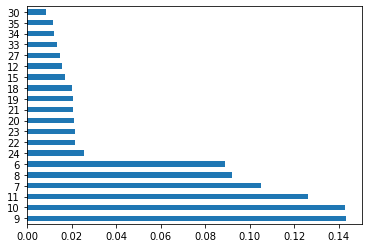

In [ ]:
# Plot feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion Matrix for Grid Search

[[1071    0    0    0    0    3    0    0    0    0    0]
 [   0 1081    0    0    0    0    0    0    1    7    0]
 [   0    0 1040    0    4    0    0    0    0    0    0]
 [   0    0    0 1047    1    0    0    0    0    0    0]
 [   0    0   10    0 1043    0    0   13    0    0    0]
 [   1    0    0    0    0 1055    0    0    1    0    0]
 [   0    0    0    1    0    0 1102    0    0    0    0]
 [   0    0    0    2    4    0    0 1023    0    0    0]
 [   1    5    0    0    0    0    0    0 1005    1    0]
 [   0    4    0    0    0    0    0    0    0 1068    0]
 [   0    0    0    0    0    0    0    0    0    0 1108]]


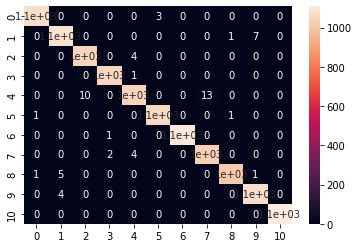

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()